# Gaussian Smoothing

Complete the functions below, and run the cell.

1. `gaussian_kernel()`
2. `convolve()`

The cell first asks the user to upload an image to be smoothed (if the form `upload_image` is on), compute the gaussian kernel, and apply it to the image. The radius and the variance of the kernel are specified by the variables `kernel_radius` and `sigma` via the form in the cell.

----

*hint*: An isotropic 2D Gaussian kernel is given by
\begin{equation}
h(x, y) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2+y^2}{2\sigma^2}\right),
\end{equation}
where $\sigma$ is the variance, and the Gaussian smoothing is defined as
\begin{equation}
g(x) = f(x) * h(x),
\end{equation}
where $f(x)$ is the uploaded image.


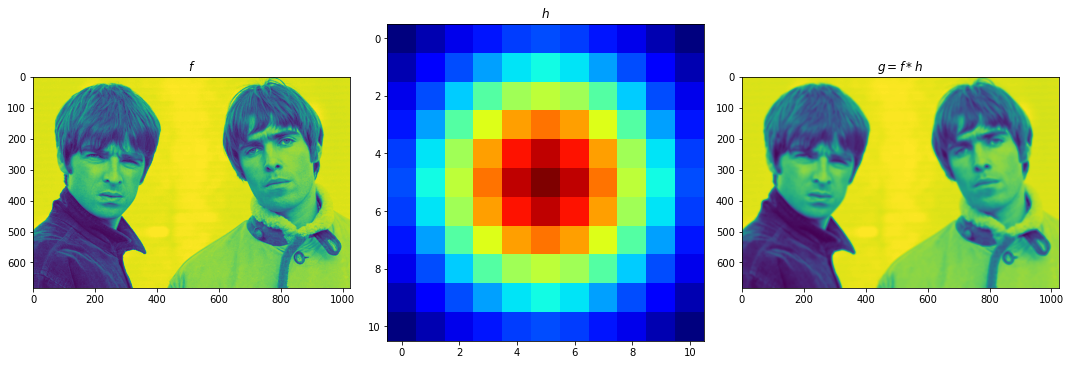

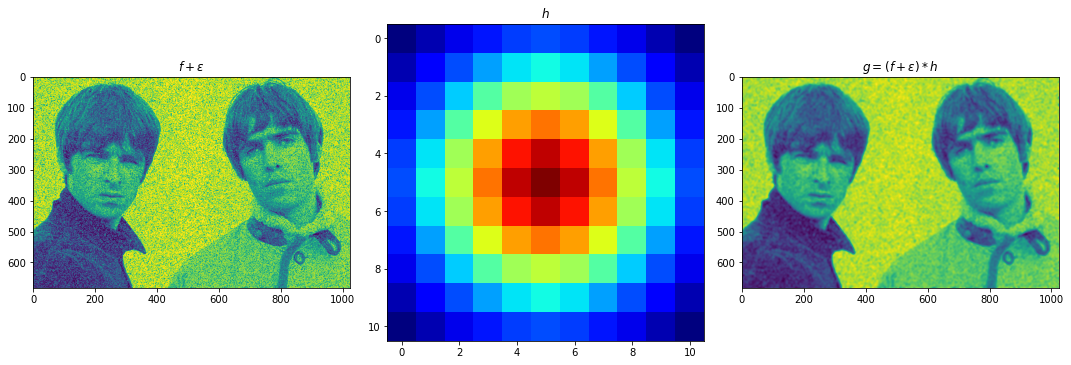

In [2]:
#@title Gaussian Smoothing
upload_image = True #@param {type:"boolean"}
kernel_radius = 5 #@param {type:"integer"}
sigma = 3 #@param {type:"number"}

import cv2
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
exp = np.exp
ndarray = np.ndarray

def gaussian_kernel(sigma: float, kernel_radius: float):
    """
    Return a 2D Gaussian kernel of size (kernel_radius*2+1, kernel_radius*2+1)
    """
    vec = np.linspace(-kernel_radius, kernel_radius, 2 * kernel_radius + 1)
    exp_vec = exp(- vec ** 2 / (2 * sigma ** 2))
    return 1 / (2 * pi * sigma ** 2) * np.outer(exp_vec, exp_vec)

def convolve(f, g):
    """
    Return f*g as a 2D array of dtype=np.uint8

    g がカーネルであると仮定
    """
    g_h, g_w = g.shape
    g_h_half, g_w_half = int(g_h / 2), int(g_w / 2)
    f_pad = np.pad(f, ((g_h_half, g_h_half), (g_w_half, g_w_half)), "edge")
    h, w = f_pad.shape
    mat = np.zeros((h, w))
    for i in range(g_h_half, h - g_h_half):
        for j in range(g_w_half, w - g_w_half):
            mat[i, j] = np.sum(f_pad[i - g_h_half : i + g_h_half + 1, j - g_w_half: j + g_w_half + 1] * g)
    return mat[g_h_half : h - g_h_half, g_w_half : w - g_w_half] # paddingした分を取り除く
            

# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv    
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


f = cv2.imread("./images/oasis.jpg", cv2.IMREAD_GRAYSCALE)

h = gaussian_kernel(sigma, kernel_radius)
g = convolve(f, h)

fig, axes = plt.subplots(1, 3, figsize=(15, 15))

axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g)
axes[2].set_title(r'$g=f*h$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = convolve(f2, h)
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(f2)
axes[0].set_title(r'$f + \epsilon$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g2)
axes[2].set_title(r'$g=(f+\epsilon)*h$')
fig.tight_layout()
plt.show(fig)

# Median Filtering

Complete the functions below, and run the cell.

* `median_filtering()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then apply the median filter. The radius of the filter is specified by the variable `kernel_radius` via the form in the cell.


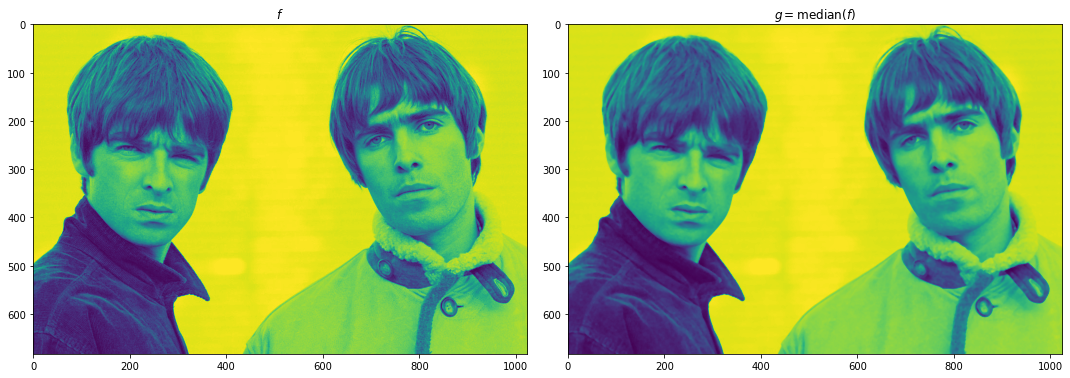

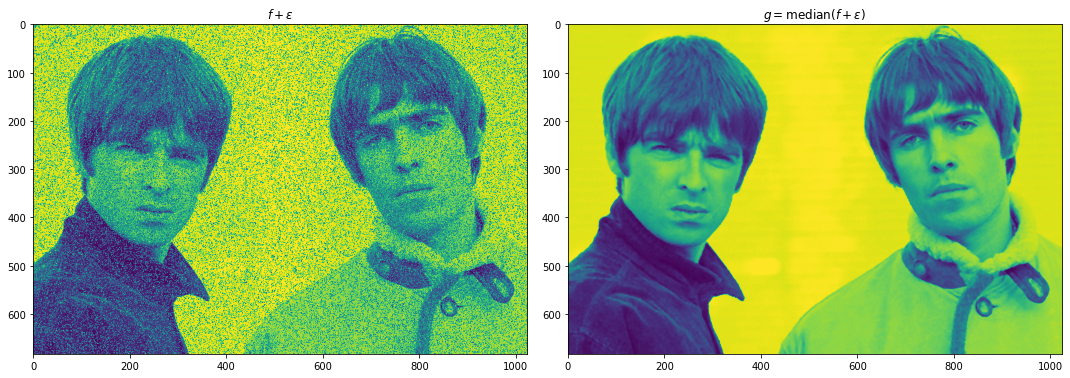

In [41]:
#@title Median Filtering
upload_image = True #@param {type:"boolean"}
kernel_radius = 2 #@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt


def median_filtering(f, kernel_radius):
    """
    Apply the result of median filtering to f.
    The size of the window is (kernel_radius*2+1, kernel_radius*2+1).
    """
    f_pad = np.pad(f, (kernel_radius, kernel_radius), "edge")
    h, w = f_pad.shape
    mat = np.zeros_like(f_pad)
    for i in range(kernel_radius, h - kernel_radius):
        for j in range(kernel_radius, w - kernel_radius):
            mat[i, j] = np.median(f_pad[i - kernel_radius : i + kernel_radius + 1, j - kernel_radius : j + kernel_radius + 1])
    return mat[kernel_radius : h - kernel_radius, kernel_radius : w - kernel_radius]
    

# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv    
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


f = cv2.imread("./images/oasis.jpg", cv2.IMREAD_GRAYSCALE)
g = median_filtering(f, kernel_radius)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g)
axes[1].set_title(r'$g=\mathrm{median}(f)$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = median_filtering(f2, kernel_radius)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(f2)
axes[0].set_title(r'$f+\epsilon$')
axes[1].imshow(g2)
axes[1].set_title(r'$g=\mathrm{median}(f+\epsilon)$')
fig.tight_layout()
plt.show(fig)


# Sub-Sampling with Gaussian Pre-Filtering

Complete the functions below, and run the cell.

1. `subsampling()`
2. `subsampling_with_gaussian()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then outputs the sub-sampled images with and without Gaussian prefiltering. The target image size, $1/\mathrm{ratio}$ of the original, is specified by the variable `ratio` via the form in the cell. Similarly the Guassian kernel for prefiltering is specified by `kernel_radius` and `sigma`.


Original Image


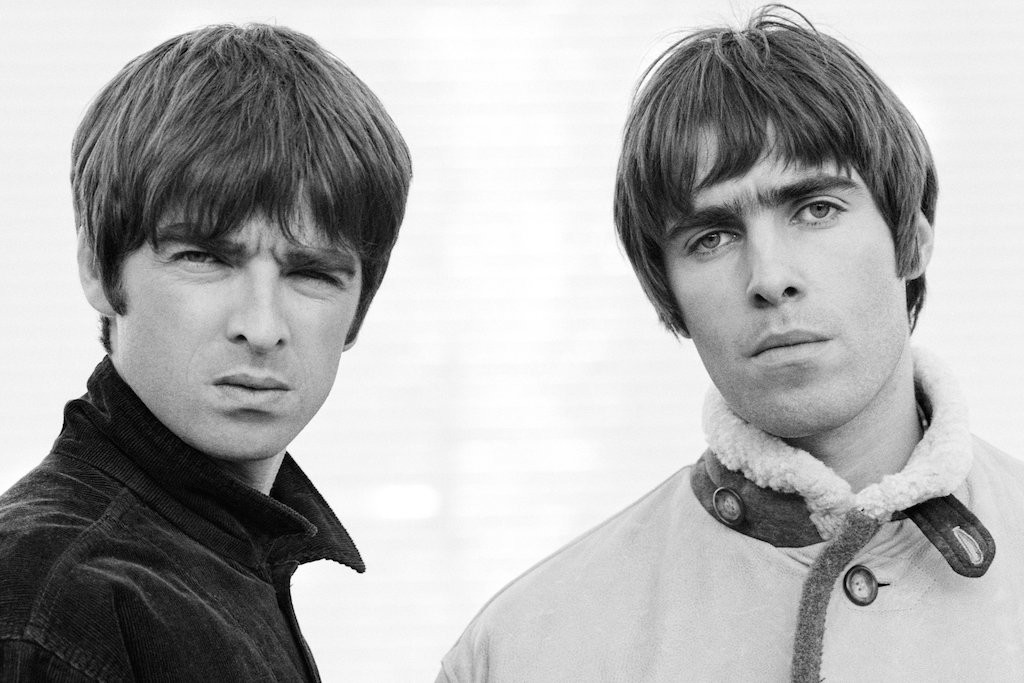

1/8 w/o prefiltering


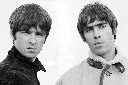

1/8 with prefiltering


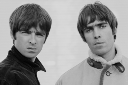

In [17]:
#@title Sub-Sampling with Gaussian Pre-Filtering
upload_image = True #@param {type:"boolean"}
ratio = 8 #@param {type:"integer"}
kernel_radius = 3 #@param {type:"integer"}
sigma = 2 #@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from PIL import Image

def subsampling(f, ratio):
    """
    Subsample the image without prefiltering.
    The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
    """
    h, w = f.shape
    new_h, new_w = h // ratio, w // ratio
    subsample = np.zeros((new_h, new_w))
    for i in range(new_h):
        for j in range(new_w):
            subsample[i, j] = f[i * ratio, j * ratio]
    return subsample
            

def subsampling_with_gaussian(f, ratio, kernel_radius, sigma):
    """
    Subsample the image with Gaussian prefiltering.
    The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
    kernel_radius and sigma specifies the Gaussian kernel.
    """
    kernel = gaussian_kernel(sigma, kernel_radius)
    return subsampling(convolve(f, kernel), ratio)
    
def show_raw(img):
    IPython.display.display(Image.fromarray(np.uint8(img)))


# if upload_image is True:
    # f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)

f = cv2.imread("./images/oasis.jpg", cv2.IMREAD_GRAYSCALE)
g1 = subsampling(f, ratio)
g2 = subsampling_with_gaussian(f, ratio, kernel_radius, sigma)

print('Original Image')
show_raw(f)
print('1/%d w/o prefiltering' % ratio)
show_raw(g1)
print('1/%d with prefiltering' % ratio)
show_raw(g2)

# Difference of Gaussians

Complete the functions below, and run the cell.

1. `difference_of_gaussians_1()`
2. `difference_of_gaussians_2()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and computes the difference of Gaussians in two different approaches.

The funstion `difference_of_gaussian_1()` computes Gaussian smoothing with two different kernels (`kernel_radius1`&`sigma1`, `kernel_radius2`&`sigma2`), and then returns their absolute difference.

The function `difference_of_gaussian_2()` computes Gaussian smoothing with a single kernel (`kernel_radius1`&`sigma1`) for two images of different sizes: the original image and its $1/\mathrm{ratio}$ subsampled one.

By choosing `kernel_radius1`, `sigma1`, `kernel_radius2`, `sigma2`, and `ratio` appropriately, the two output images become visually identical to each other.


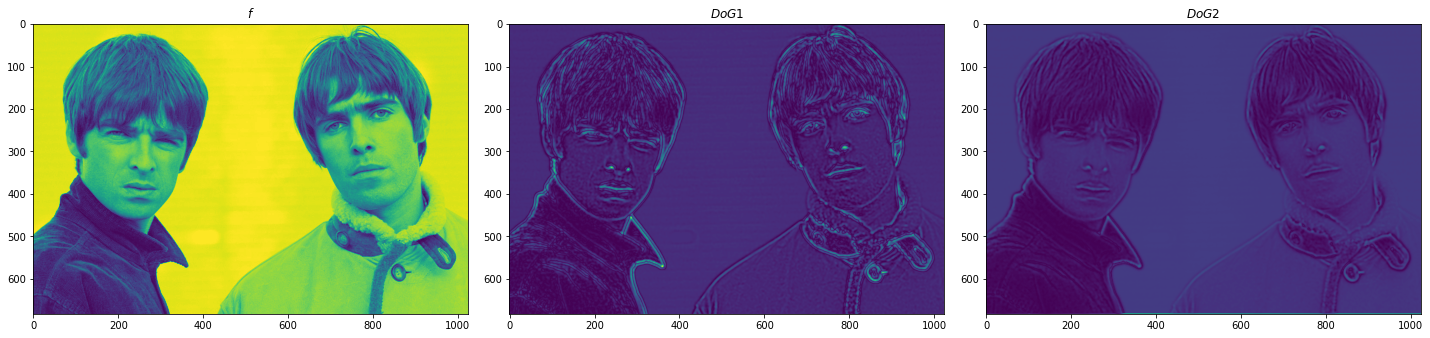

In [35]:
#@title Difference of Gaussians
upload_image = False #@param {type:"boolean"}
kernel_radius1 = 3 #@param {type:"integer"}
sigma1 = 2 #@param {type:"integer"}
kernel_radius2 = 7 #@param {type:"integer"}
sigma2 = 4 #@param {type:"integer"}
ratio = 2 #@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt


def difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0
    # g1 = f* Gaussian of kernel size=(kernel_radius1*2+1, kernel_radius1*2+1), variance=sigma1
    kernel1 = gaussian_kernel(sigma1, kernel_radius1)
    g1 = convolve(f, kernel1)

    # g2 = f * Gaussian of kernel size=(kernel_radius2*2+1, kernel_radius2*2+1), variance=sigma2
    kernel2 = gaussian_kernel(sigma2, kernel_radius2)
    g2 = convolve(f, kernel2)
    
    # return |g1 - g2| as np.uint8 array
    return np.abs(g1 - g2)
    

def difference_of_gaussians_2(f, kernel_radius, sigma, ratio):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0
    # g1 = f * Gaussian of kernel size=(kernel_radius*2+1, kernel_radius*2+1), variance=sigma
    kernel1 = gaussian_kernel(sigma, kernel_radius)
    g1 = convolve(f, kernel1)

    # g2 = 1/ratio size image of f
    g2 = subsampling(f, ratio)
    
    # g3 = g2 * Gaussian of kernel size=(kernel_radius*2+1, kernel_radius*2+1), variance=sigma
    kernel2 = gaussian_kernel(sigma, kernel_radius * 2 + 1)
    g3 = convolve(g2, kernel2)
    
    # g4 = upsampling of g3 to the original size of f
    g4 = np.zeros_like(g1)
    small_h, small_w = g3.shape
    for i in range(small_h):
        for j in range(small_w):
            g4[ratio * i : ratio * (i + 1), ratio * j : ratio * (j + 1)] = g3[i, j]
    
    # return |g1 - g4| as np.uint8 array
    return np.abs(g1 - g4)
    

f = cv2.imread("./images/oasis.jpg", cv2.IMREAD_GRAYSCALE)
g1 = difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2)
g2 = difference_of_gaussians_2(f, kernel_radius1, sigma1, ratio)

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g1)
axes[1].set_title(r'$DoG1$')
axes[2].imshow(g2)
axes[2].set_title(r'$DoG2$')
fig.tight_layout()
plt.show(fig)